## Как найти стог сена в иголке? Практический проект по построению системы поиска аномалий.

Необходимо настроить систему по поиску аномалий в банковских транзакциях. Переменные анонимизированы и представляют собой первые 28 компонент, полученных после PCA преобразования оригинальных данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 1. EDA & Preprocessing

In [3]:
pd.set_option('display.max_columns', 50)
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.duplicated().sum()

1081

In [7]:
data.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

Всего 31 признак --> 28 главных компонент + `Time, Amount, Class`. Пропусков в данных нет. Есть 1081 дубликат. При этом всего 284807 наблюдений, а уникальных значений в 28 главных компонентах 275663. Проверим количество дубликатов по ним.

In [8]:
print('Кол-во дубликатов в 28 главных компонентах: {}'.format(data.drop(columns=['Time', 'Amount', 'Class']).duplicated().sum()), end='\n\n')
print('Кол-во дубликатов в 28 главных компонентах и признаке "Class": {}'.format(data.drop(columns=['Time', 'Amount']).duplicated().sum()), end='\n\n')
print('Кол-во дубликатов в 28 главных компонентах и признаках "Class" и "Amount": {}'.format(data.drop(columns=['Time']).duplicated().sum()))

Кол-во дубликатов в 28 главных компонентах: 9144

Кол-во дубликатов в 28 главных компонентах и признаке "Class": 9144

Кол-во дубликатов в 28 главных компонентах и признаках "Class" и "Amount": 9144


Без учета признака `Time` дубликатов уже 9144. Это довольно подозрительно, но может быть данные транзакции выполнялись одними и теми же людьми в разное время. Кто знает..

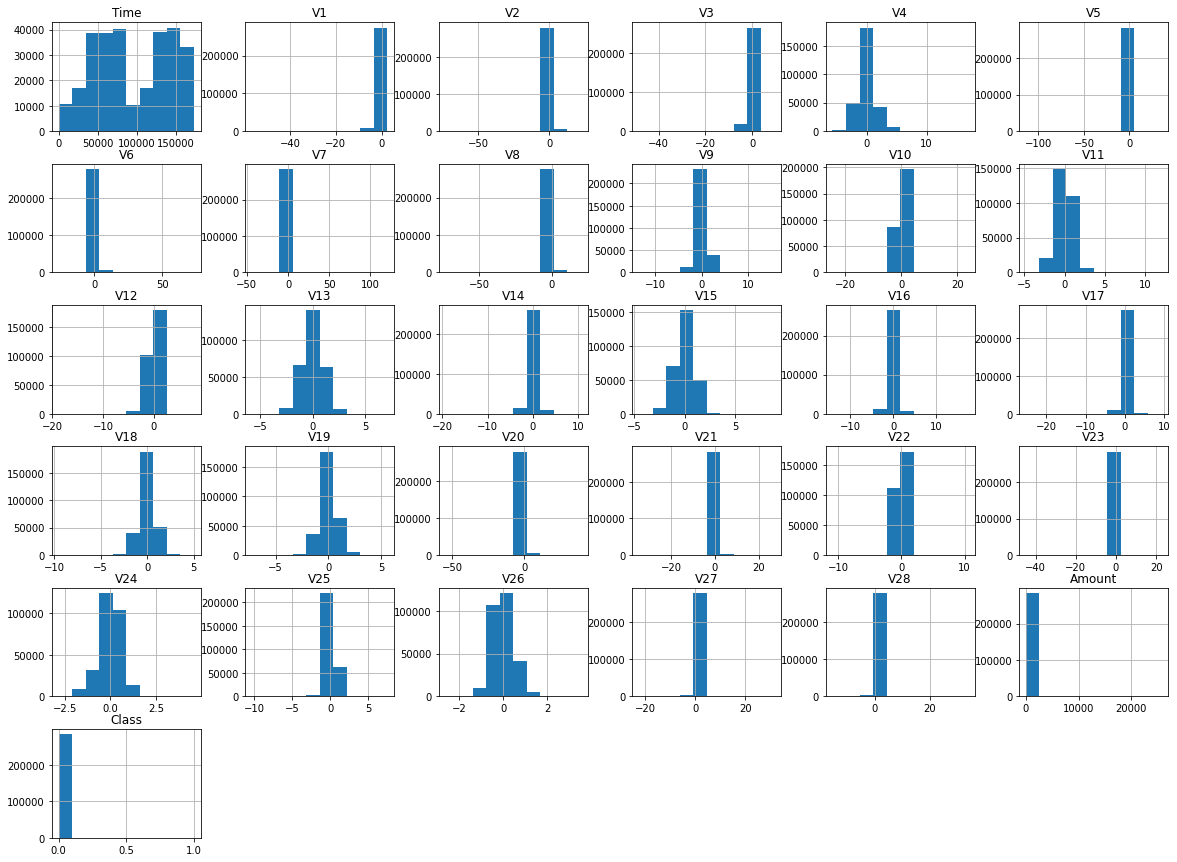

In [9]:
data.hist(figsize=(20, 15))
plt.show()

У признака `Time` наблюдается резкое снижение кол-ва значений в районе 100000. Главные компоненты смаштабированы, поэтому их распределение колеблется в районе 0.

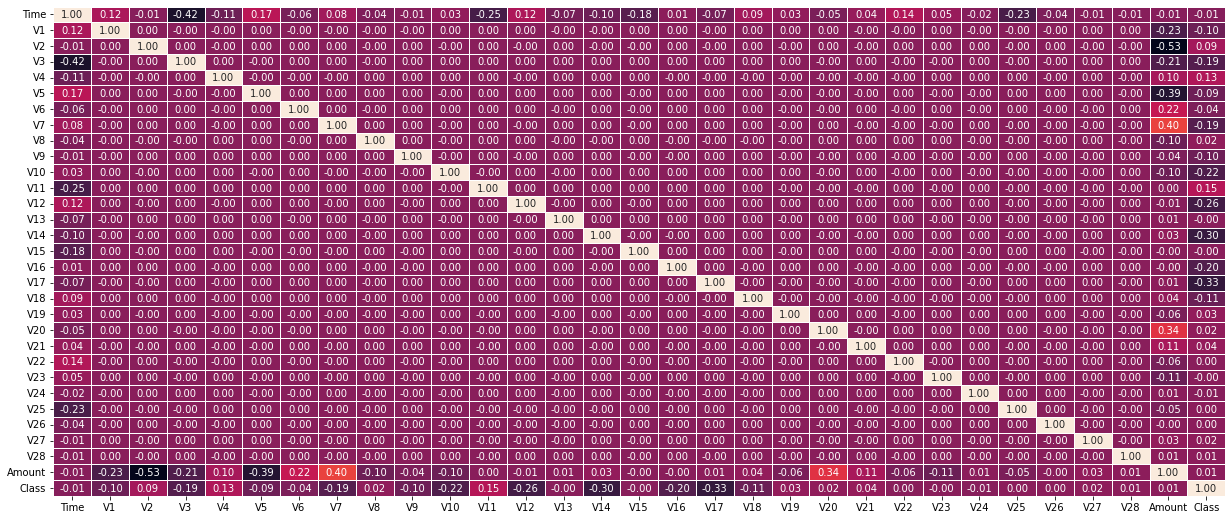

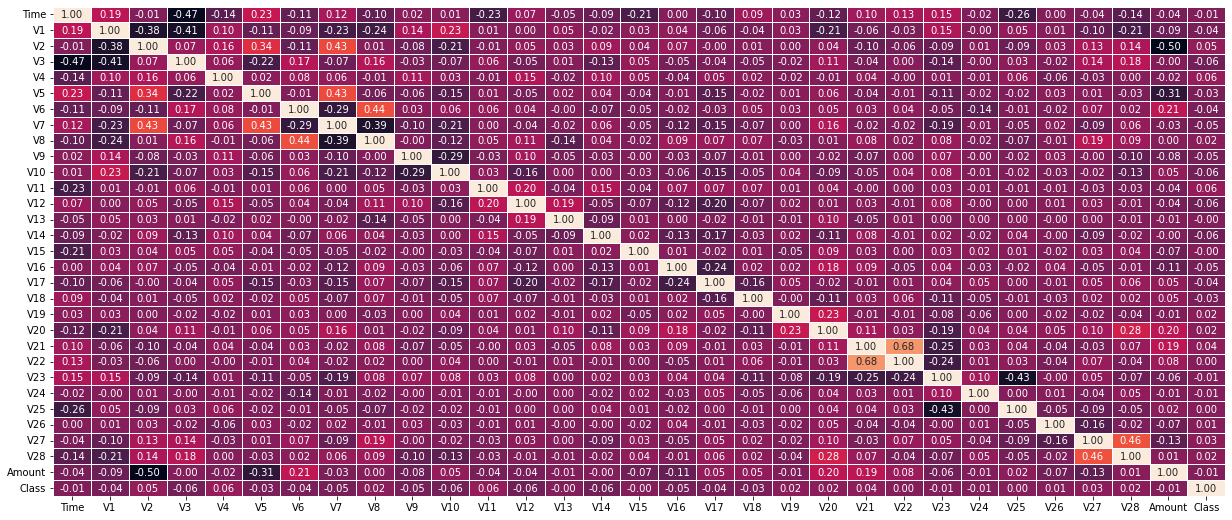

In [10]:
plt.figure(figsize=(21, 9))
sns.heatmap(data.corr(method='pearson'), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()
plt.figure(figsize=(21, 9))
sns.heatmap(data.corr(method='spearman'), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

Наиболее сильная корреляция у признаков `V21` и `V22`, чем она объясняется - неизвестно, т.к. данные анонимизированы. Таким образом, удалять по корреляционной связи нечего.

По выбросам чистить датасет не будем, т.к. они могут указывать на аномальные значения.

Посмотрим на распределение значений в признаке `Class`.

In [11]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Значений класса 1 значительно меньше - они указывают на аномальные значения. Посмотрим на процентное содержание аномалий.

In [12]:
print('Процентное содержание аномалий: {:.2%}'.format(data.Class.value_counts()[1]/data.shape[0]))

Процентное содержание аномалий: 0.17%


## 2. Modeling

Построим следующие модели поиска аномалий: `IQR, Distance-based clusterization, DBSCAN, One-Class SVM, Isolation forest`. Модель `3-сигмы` не строим, т.к. для нее нужно нормальное распределение всех данных, которого у нас нет.

### <font color = 'palegreen'>2.1 IQR

In [13]:
def outlier_iqr(data, col, threshold=3):
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    up_bound = data[col].quantile(0.75) + (IQR * threshold)
    low_bound = data[col].quantile(0.25) - (IQR * threshold)
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound


def get_column_outliers(data, columns=None, function=outlier_iqr, threshold=3):
    if columns:
        columns_to_check = columns
    else:
        columns_to_check = data.columns
        
    outliers = pd.Series(data=[False]*len(data), index=data_features.index, name='is_outlier')
    comparison_table = {}
    for column in columns_to_check:
        anomalies, upper_bound, lower_bound = function(data, column, threshold=threshold)
        comparison_table[column] = [upper_bound, lower_bound, sum(anomalies), 100*sum(anomalies)/len(anomalies)]
        outliers[anomalies[anomalies].index] = True
    
    comparison_table = pd.DataFrame(comparison_table).T
    comparison_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
    comparison_table = comparison_table.sort_values(by='anomalies_percentage', ascending=False)
    
    return comparison_table, outliers

def anomalies_report(outliers):
    print("Total number of outliers: {}\nPercentage of outliers:   {:.2f}%".format(
            sum(outliers), 100*sum(outliers)/len(outliers))) 

In [14]:
data_features = data.iloc[:, :-1]

comparison_table, iqr_outliers = get_column_outliers(data_features)
anomalies_report(iqr_outliers)

Total number of outliers: 53336
Percentage of outliers:   18.73%


Аномалий даже с диапазоном в 3 межквартильных интервала получается 18.7% от общего числа наблюдений, что значительно выше целевого значения 0.17%.

### <font color = 'palegreen'>2.2 Distance-based clusterization

Для данного метода нужна нормализация данных. Выполним её при помощи функции RobustScaler, которая устойчива к наличию выбросов (аномалий).

In [15]:
from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = pd.DataFrame(
    data=scaler.fit_transform(data_features), 
    columns=data_features.columns
)

In [16]:
class DistanceOutliers(BaseEstimator):
    """
    -----------
    Parameters:
    
    - metric: string, default - euclidean
        metric to use for distance calculation (see scipy.spatial.distance.cdist)
        
    - percentile: float in range [0, 100]
        hyperparameter which sets the threshold for anomalies
    """
    def __init__(self, metric='euclidean', percentile=99.83):
        self.metric = metric
        self.percentile = percentile
        
    def fit(self, X):
        self.centroid = np.mean(X, axis=0).values.reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)
        
    def predict(self, X):
        distances = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        predictions = (distances > self.threshold).astype(int)
        return predictions

In [17]:
euclidian_model = DistanceOutliers(metric='euclidean', percentile=99.83)
euclidian_model.fit(scaled_data)
euclidian_outliers = euclidian_model.predict(scaled_data)
anomalies_report(euclidian_outliers)

Total number of outliers: 485
Percentage of outliers:   0.17%


In [18]:
cityblock_model = DistanceOutliers(metric='cityblock', percentile=99.83)
cityblock_model.fit(scaled_data)
cityblock_outliers = cityblock_model.predict(scaled_data)
anomalies_report(cityblock_outliers)

Total number of outliers: 485
Percentage of outliers:   0.17%


Модель Distance-based clusterization настроена на целевое содержание аномалий.

### <font color = 'palegreen'>2.3 DBSCAN

In [19]:
from sklearn.cluster import DBSCAN

# выбираем eps=3, т.к. при большем значении слетает выполнение скрипта
model = DBSCAN(eps=3).fit(scaled_data)
density_outliers = np.array([1 if label == -1 else 0 for label in model.labels_])

anomalies_report(density_outliers)

Total number of outliers: 27849
Percentage of outliers:   9.78%


In [ ]:
model = DBSCAN(eps=4).fit(scaled_data)
density_outliers = np.array([1 if label == -1 else 0 for label in model.labels_])

anomalies_report(density_outliers)

Содержание аномалий при eps=3 составляет 9.78%.

### <font color = 'palegreen'>2.4 One-Class SVM

In [20]:
from sklearn.svm import OneClassSVM

one_class_svm = OneClassSVM(nu=0.0017, gamma='auto')
one_class_svm.fit(scaled_data)
svm_outliers = one_class_svm.predict(scaled_data)
svm_outliers = np.array([1 if label == -1 else 0 for label in svm_outliers])
anomalies_report(svm_outliers)

Total number of outliers: 2758
Percentage of outliers:   0.97%


Модель One-Class SVM недообучилась и показывает процент аномалий равный 0.97%, тогда как в гиперпараметрах задано 0.17%.

### <font color = 'palegreen'>2.5 Isolation forest

In [21]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100, contamination=0.0017, 
                                   max_features=1.0, bootstrap=True)
isolation_forest.fit(scaled_data)

isolation_outliers = isolation_forest.predict(scaled_data)
isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])

anomalies_report(isolation_outliers)

Total number of outliers: 485
Percentage of outliers:   0.17%


Модель Isolation forest настроена на целевое содержание аномалий.

## 3. Quality test

Проведем оценку качества моделей методами `classification report` и `confusion matrix`.

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

summary_outliers = np.concatenate((
    [iqr_outliers],
    [euclidian_outliers],
    [cityblock_outliers],
    [density_outliers],
    [svm_outliers],
    [isolation_outliers],
    [data.Class]
))

summary_outliers = pd.DataFrame(
    summary_outliers.T, 
    columns=['Iqr', 'DBC_euclidian', 'DBC_cityblock', 'DBSCAN', 'SVM', 'Isolation_forest', 'Target']
)

summary_outliers.head()

,Iqr,DBC_euclidian,DBC_cityblock,DBSCAN,SVM,Isolation_forest,Target
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [23]:
for column in summary_outliers.columns[:-1]:
    print('\033[92m', '\033[4m', 'Модель {}'.format(column), '\033[0m')
    print('{}\n {}'.format(print(classification_report(summary_outliers.Target, summary_outliers[column])), print(confusion_matrix(summary_outliers.Target, summary_outliers[column]))))

  Модель Iqr 
              precision    recall  f1-score   support

           0       1.00      0.81      0.90    284315
           1       0.01      0.92      0.02       492

    accuracy                           0.81    284807
   macro avg       0.50      0.87      0.46    284807
weighted avg       1.00      0.81      0.90    284807

[[231431  52884]
 [    40    452]]
None
 None
  Модель DBC_euclidian 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.04      0.04      0.04       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807

[[283848    467]
 [   474     18]]
None
 None
  Модель DBC_cityblock 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.23      0.23      0.23       492

    accuracy                

У модели Iqr практически отсутствует точность определения аномалий (0.01), высокая полнота (0.92) и низкий f1 (0.02) - модель предсказывает кол-во аномалий гораздо больше, чем есть на самом деле.

У модели DBC_euclidian крайне низкие значения определения точности, полноты и f1 (все по 0.04) - модель не справляется с определением аномалий.

У модели DBC_cityblock низкие значения определения точности, полноты и f1 (все по 0.23) - модель работает лучше, чем DBC_euclidian, но все равно не так хорошо, как хотелось бы.

У модели DBSCAN практически отсутствует точность определения аномалий (0.01), средняя полнота (0.76) и низкий f1 (0.03) - модель предсказывает кол-во аномалий гораздо больше, чем есть на самом деле.

У модели One-class SVM низкая точность определения аномалий (0.05), низкая полнота (0.29) и низкий f1 (0.09) - модель не справляется с определением аномалий.

У модели Isolation_forest низкие значения определения точности, полноты и f1 (0.18, 0.17 и 0.18 соответственно) - модель работает хуже, чем DBC_cityblock, но лучше всех остальных.


### Лучшая из моделей `Distance-based clusterization (cityblock)` - она определяет лишь 23% аномалий.

## 4. Data representation

In [24]:
from sklearn.manifold import TSNE

data_reduced = TSNE(n_components=2, random_state=800, n_jobs=-1).fit_transform(scaled_data)


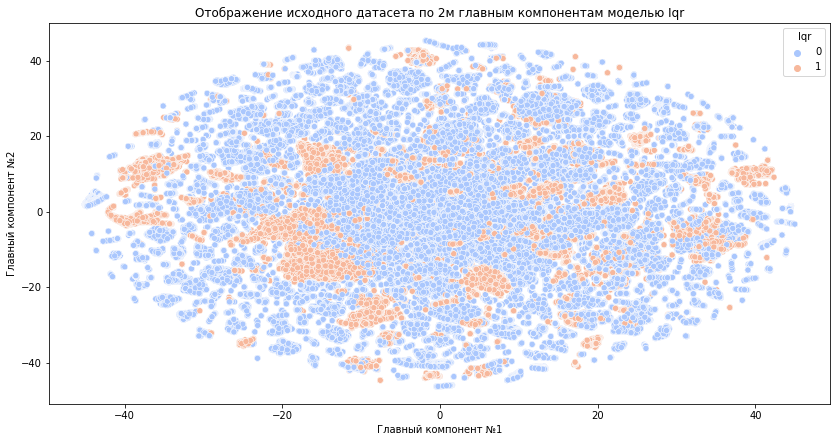

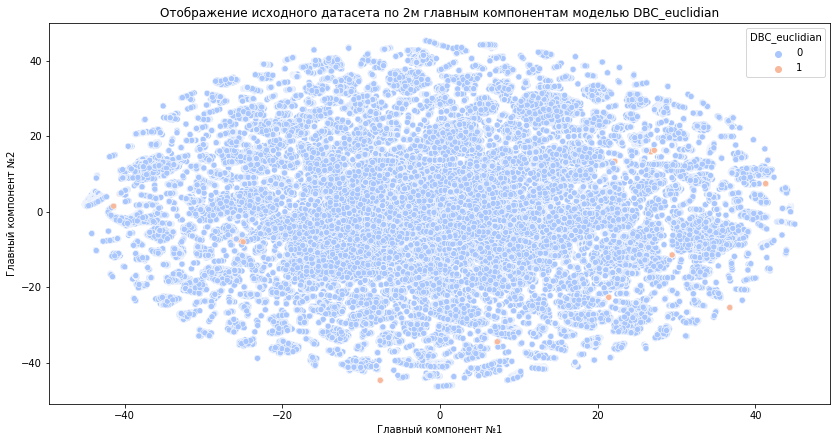

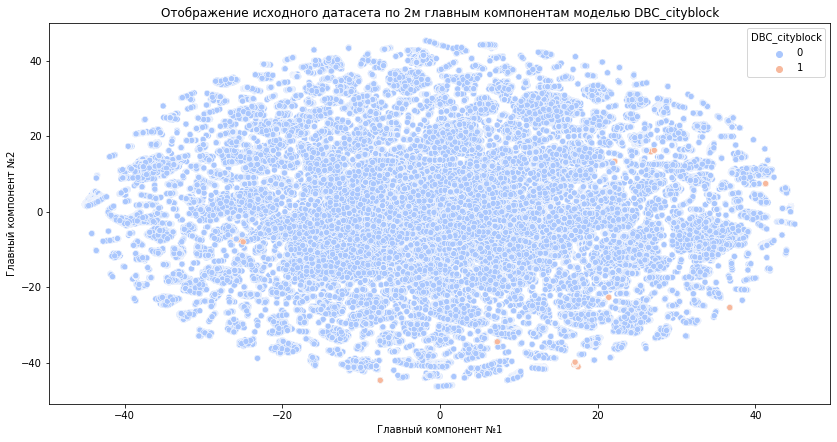

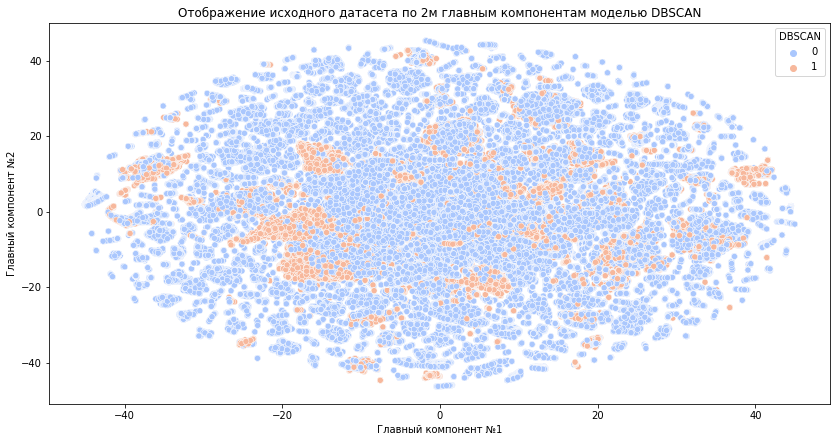

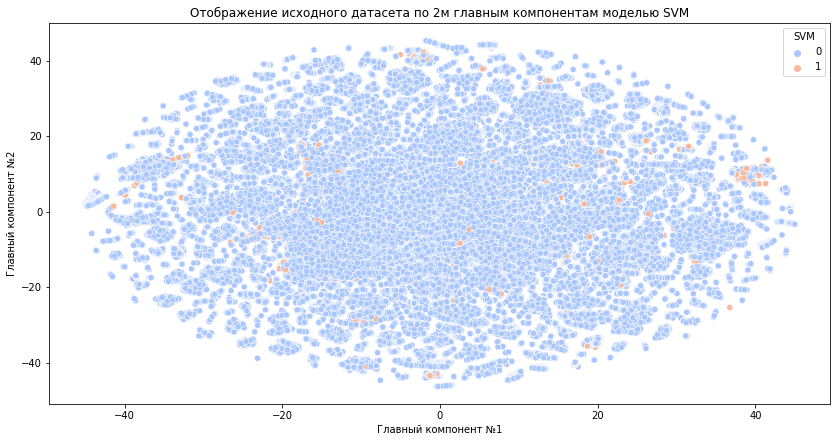

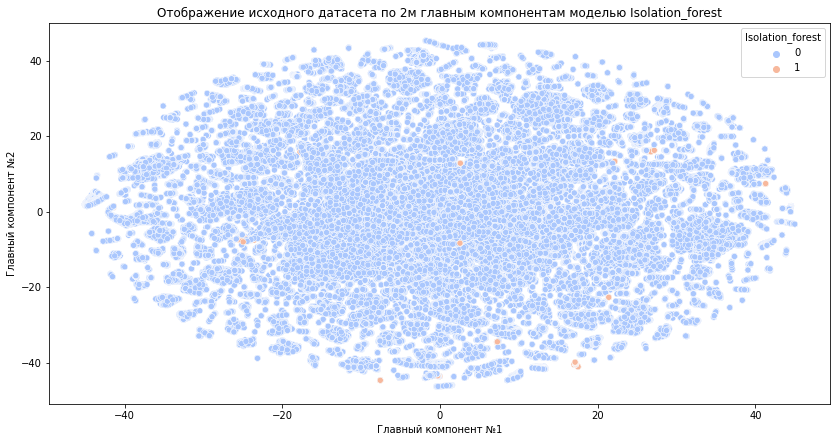

In [25]:
for column in summary_outliers.columns[:-1]:
    plt.figure(figsize=(14, 7))
    ax = sns.scatterplot(x=data_reduced[:,0], y=data_reduced[:,1], hue=summary_outliers[column], palette='coolwarm')
    ax.set(xlabel='Главный компонент №1', ylabel='Главный компонент №2', title='Отображение исходного датасета по 2м главным компонентам моделью {}'.format(column))
    plt.show()

По представленным распределениям в объеме 2х главных компонентов во всех моделях можно выделить часть точек, которые находятся на некотором расстоянии от основного скопления и определены моделями как аномальные. Большая же часть определенных аномальными значений лежит в скоплениях точек, т.е. по факту не являются аномалиями.